In [1]:
import pandas as pd
with open("points3D.txt") as f:
    points3D = f.read().splitlines() 

In [2]:
from tqdm import tqdm
# captture nodes in 2 separate lists
X = []
Y = []
Z = []

for i in tqdm(points3D):
  X.append(i.split(' ')[1])
  Y.append(i.split(' ')[2])
  Z.append(i.split(' ')[3])

df_points3D = pd.DataFrame({'X': X, 'Y': X, 'Z' : Z})

100%|██████████| 1310012/1310012 [00:02<00:00, 468932.30it/s]


In [4]:
for i in range(0, len(X)):
    X[i] = float(X[i])
for i in range(0, len(Y)):
    Y[i] = float(Y[i])
for i in range(0, len(Z)):
    Z[i] = float(Z[i])

100%|██████████| 4/4 [00:06<00:00,  1.67s/it]


total_count :  12
real_count :  7


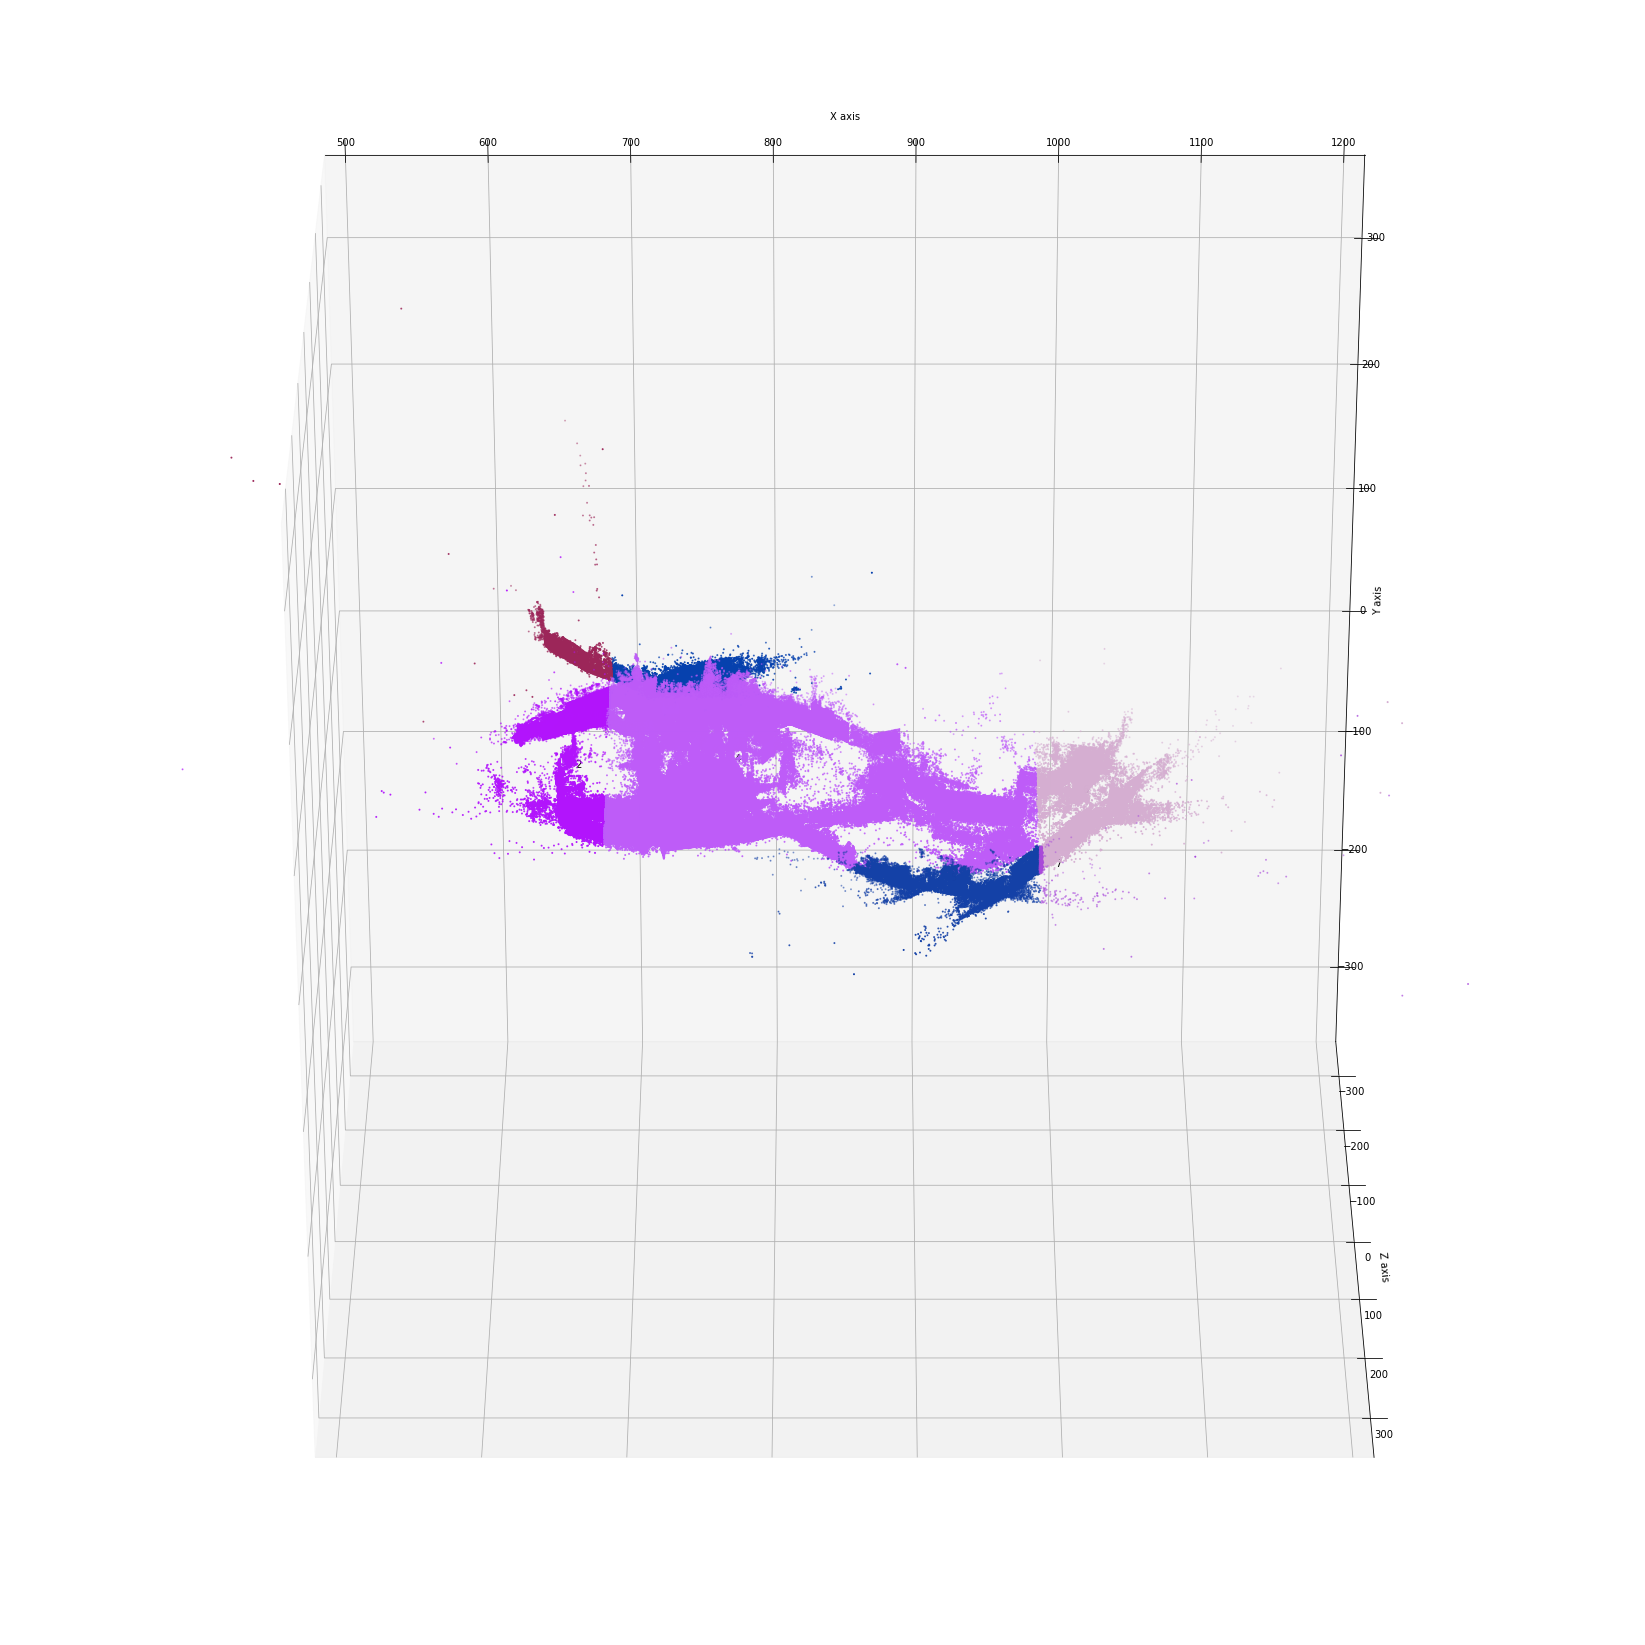

In [5]:
def mean(num):
    return sum(num)/len(num)

#필요한 라이브러리 임포트 
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from IPython.display import HTML
from matplotlib import animation

pair=[]
#X,Y,Z좌표를 하나의 리스트안에 담기위해 temp에 저장한뒤에 이것을 pair 리스트에 담는다.
for i in range(0,len(X)):
    tmp=(X[i],Y[i],Z[i])
    pair.append(tmp)
#visualize할 사이즈는 30 by 30이며, 3D로 볼것을 선언한다. 
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax = plt.axes(projection='3d')

VoxelID=[]
total_count=0 #빈 복셀도 포함한 전체 연산하는 복셀의 
real_count=0 #실제 값이 10개이상있는 복셀들 수 
interval=300 #복셀들간의 간격 여기서는 하나의 복셀의 크기가 interval^3의 크기가 된다.
for i in tqdm(range(int(min(X)-1),int(max(X))+1,interval)):#X좌표 최솟값부터 최댓값까지 interval 간격으로 for문을 돈다.
    for j in range(int(min(Y)-1),int(max(Y))+1,interval):#Y좌표 최솟값부터 최댓값까지 interval 간격으로 for문을 돈다.
        for k in range(int(min(Z)-1),int(max(Z))+1,interval):#Z좌표 최솟값부터 최댓값까지 interval 간격으로 for문을 돈다.
            #임시적으로 저장할 x2,y2,z2를 선언한다. 실제 여기에 담긴 값이 scatter된다.
            x2=[]
            y2=[]
            z2=[]
            for x,y,z in pair:#3D point가 담긴 pair에서 x,y,z값을 분리하여 for문을 돈다.
                if (x>i)&(x<i+interval)&(y>j)&(y<j+interval)&(z>k)&(z<k+interval):#각각의 x,y,z좌표가 interval 범위안에 들면 x2,y2,z2에 담는다. 여기에 담긴것이 하나의 쌍이된다.
                  x2.append(x)
                  y2.append(y)
                  z2.append(z)
            total_count=total_count+1      
            if len(x2) >=10:#복셀안에 3D point가 10개 이상인것만 scatter한다. 그 미만은 noise라고 보는것.
                real_count=real_count+1 #실제 복셀값 카운트      
                ax.scatter(x2, y2,z2,s=1, c=np.random.rand(3,))#같은 복셀안에있는 값은 같은 색상으로 한다. 여기가 indexing해주는 부분이다. 
                ax.text(mean(x2),mean(y2),mean(z2),  '%s' % (str(real_count)), size=10, zorder=1,  color='k') #각 복셀에 3D point의 평균 좌표값에다가 해당 voxel index를 같이 표기해준다.
                for l in range(0,len(x2)):
                    VoxelID.append(real_count)
                    #print(real_count)       
            else:
                for l in range(0,len(x2)):
                    VoxelID.append(0)
                    #print(0)       
print('total_count : ',total_count)
print('real_count : ',real_count)

#size 700 by 700 by 700으로 정사각형 박스안에 그려준다. 정사각형이 되지않으면 그림이 찌그러지기 때문이다. 
ax.set_xlim(500,1200)
ax.set_ylim(-350,350)
ax.set_zlim(-350,350)
# X,Y,Z축 표시 
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

#좀더 가독성을 위해 위아래 120도 평면상으로 -90도였을 때 가장 보기 좋다. 
ax.view_init(elev=120, azim=-90)
plt.show()
